# telecom churn prediction

### In this problem our classification goal is "To Predict whether a particular customer will switch to another telecom provider or not"

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
telecom_churn=pd.read_csv("churn_data.csv",na_values=' ')

In [3]:
telecom_customer=pd.read_csv("customer_data.csv")

In [4]:
telecom_internet=pd.read_csv("internet_data.csv")

In [5]:
telecom_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telecom_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
telecom_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [8]:
telecom_churn.shape

(7042, 9)

In [9]:
telecom_customer.shape

(7042, 5)

In [10]:
telecom_internet.shape

(7042, 9)

In [11]:
# meriging the files 

telecom_merge=pd.merge(telecom_churn,telecom_customer,on="customerID")

In [12]:
telecom_merge.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [13]:
telecom_final_merge=pd.merge(telecom_merge,telecom_internet,on="customerID")

In [14]:
telecom_final_merge.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
telecom_final_merge.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

There are some null values in "Total charges"

In [16]:
telecom_final_merge.nunique()

customerID          7042
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6529
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [17]:
telecom_final_merge.duplicated().sum() # there are no duplicate values

0

In [18]:
telecom_final_merge.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [19]:
telecom_final_merge[["MonthlyCharges"]]=telecom_final_merge[["MonthlyCharges"]].astype("int64")

In [20]:
telecom_final_merge['TotalCharges'].fillna(telecom_final_merge['TotalCharges'].median(),inplace=True)

In [21]:
telecom_final_merge[["TotalCharges"]]=telecom_final_merge[["TotalCharges"]].astype("int64")

In [22]:
telecom_final_merge.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29,29,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56,1889,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53,108,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42,1840,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70,151,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [23]:
telecom_final_merge["Churn"]=telecom_final_merge.pop("Churn")

# EDA 

<function matplotlib.pyplot.show(close=None, block=None)>

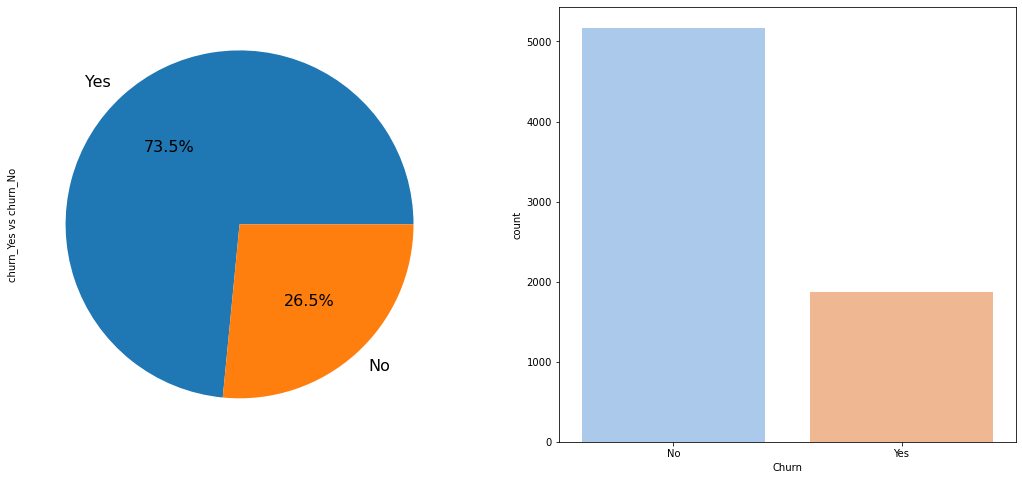

In [24]:


plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
telecom_final_merge.Churn.value_counts().plot(kind='pie',
                                                  fontsize=16,
                                              labels=["Yes","No"],
                                              ylabel="churn_Yes vs churn_No",
                                              autopct='%1.1f%%');
plt.subplot(1,2,2)
sns.countplot(x="Churn",data=telecom_final_merge,palette='pastel')
plt.show

from above we can say that 73.5% have churn_yes

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

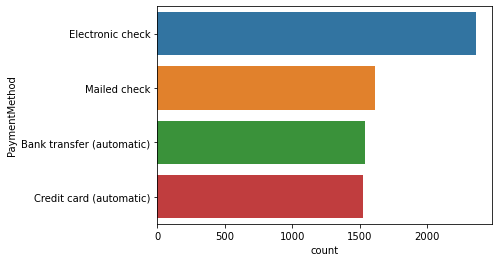

In [25]:
sns.countplot(y='PaymentMethod',data=telecom_final_merge)

Male      0.504686
Female    0.495314
Name: gender, dtype: float64

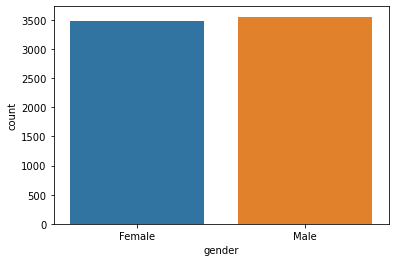

In [26]:
sns.countplot('gender',data=telecom_final_merge)

telecom_final_merge['gender'].value_counts(normalize=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

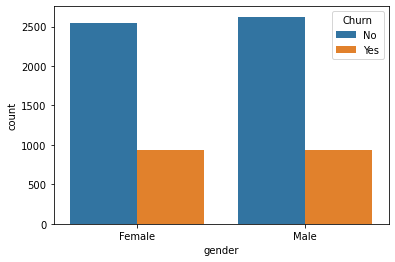

In [27]:
sns.countplot(x='gender',hue='Churn',data=telecom_final_merge)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

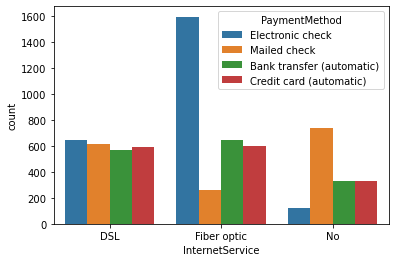

In [28]:
sns.countplot('InternetService',hue='PaymentMethod',data=telecom_final_merge)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

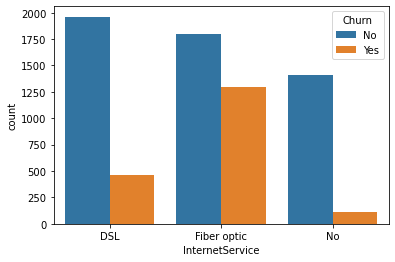

In [29]:
sns.countplot('InternetService',hue='Churn',data=telecom_final_merge)

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

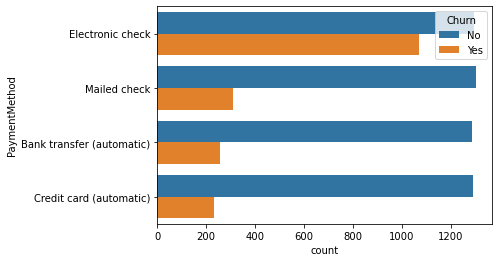

In [30]:
sns.countplot(y='PaymentMethod',hue='Churn',data=telecom_final_merge)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

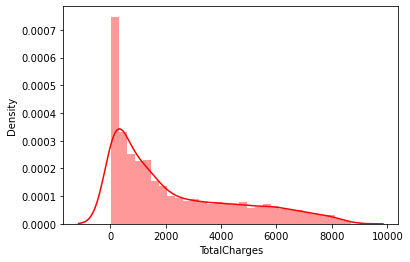

In [31]:
sns.distplot(telecom_final_merge['TotalCharges'],kde=True,color="r",bins=30)

Month-to-month    0.550270
Two year          0.240557
One year          0.209174
Name: Contract, dtype: float64

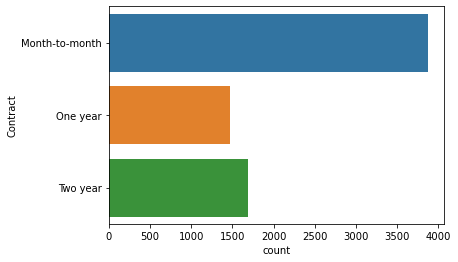

In [32]:
sns.countplot(y='Contract',data=telecom_final_merge)
telecom_final_merge['Contract'].value_counts(normalize=True)

<AxesSubplot:xlabel='Contract', ylabel='count'>

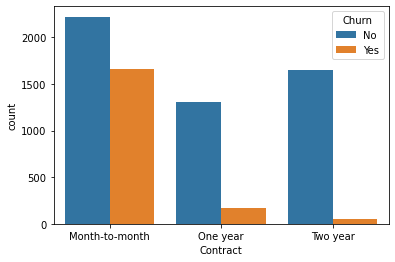

In [33]:
sns.countplot(x='Contract',hue='Churn',data=telecom_final_merge)

In [34]:
telecom_final_merge.corr()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
tenure,1.000000,0.247719,0.825421,0.016655
MonthlyCharges,0.247719,1.000000,0.650811,0.220245
TotalCharges,0.825421,0.650811,1.000000,0.102810
SeniorCitizen,0.016655,0.220245,0.102810,1.000000


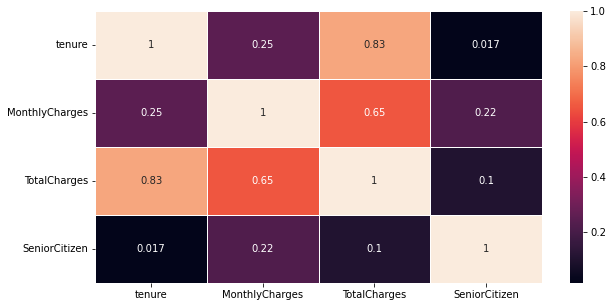

In [35]:
plt.figure(figsize = (10, 5))
sns.heatmap(data =telecom_final_merge.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [36]:
# columns to drop

telecom_final_merge.drop(["customerID","MonthlyCharges","tenure"],axis=1,inplace=True)


In [37]:
telecom_final_merge.drop(['Dependents','SeniorCitizen','Contract'],axis=1,inplace=True)

In [38]:
telecom_final_merge.head()

,PhoneService,PaperlessBilling,PaymentMethod,TotalCharges,gender,Partner,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,Yes,Electronic check,29,Female,Yes,No phone service,DSL,No,Yes,No,No,No,No,No
1,Yes,No,Mailed check,1889,Male,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Yes,Yes,Mailed check,108,Male,No,No,DSL,Yes,Yes,No,No,No,No,Yes
3,No,No,Bank transfer (automatic),1840,Male,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,Yes,Yes,Electronic check,151,Female,No,No,Fiber optic,No,No,No,No,No,No,Yes


In [39]:
telecom_final_merge.shape

(7042, 15)

In [40]:
col_cat=["PhoneService","PaperlessBilling","Partner","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Churn"]

In [41]:
for i in col_cat:
    telecom_final_merge[i]=telecom_final_merge[i].map({"No":0,"Yes":1})

In [42]:
telecom_final_merge.head()

,PhoneService,PaperlessBilling,PaymentMethod,TotalCharges,gender,Partner,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,Electronic check,29,Female,1,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1,0,Mailed check,1889,Male,0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,0
2,1,1,Mailed check,108,Male,0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,1
3,0,0,Bank transfer (automatic),1840,Male,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,0
4,1,1,Electronic check,151,Female,0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,1


In [43]:
null_values=telecom_final_merge.isnull().sum().sort_values(ascending=False)
percentage=null_values/len(telecom_final_merge)*100
df_null=pd.DataFrame({'Null':null_values,'Percentage':percentage})

In [44]:
df_null

,Null,Percentage
OnlineSecurity,1526,21.66998
OnlineBackup,1526,21.66998
DeviceProtection,1526,21.66998
TechSupport,1526,21.66998
StreamingTV,1526,21.66998
StreamingMovies,1526,21.66998
PhoneService,0,0.00000
PaperlessBilling,0,0.00000
PaymentMethod,0,0.00000
TotalCharges,0,0.00000


In [45]:
telecom_final_merge['OnlineBackup'].fillna(telecom_final_merge['OnlineBackup'].mean(),inplace=True)

In [46]:
telecom_final_merge['DeviceProtection'].fillna(telecom_final_merge['DeviceProtection'].mean(),inplace=True)

In [47]:
telecom_final_merge['OnlineSecurity'].fillna(telecom_final_merge['OnlineSecurity'].mean(),inplace=True)

In [48]:
telecom_final_merge['TechSupport'].fillna(telecom_final_merge['TechSupport'].mean(),inplace=True)

In [49]:
telecom_final_merge['StreamingTV'].fillna(telecom_final_merge['StreamingTV'].mean(),inplace=True)

In [50]:
telecom_final_merge['StreamingMovies'].fillna(telecom_final_merge['StreamingMovies'].mean(),inplace=True)

In [51]:
telecom_final_merge.isnull().sum()

PhoneService        0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
gender              0
Partner             0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

In [52]:
telecom_final_merge[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]=telecom_final_merge[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].astype("int64")

In [53]:
telecom_final_merge.dtypes

PhoneService         int64
PaperlessBilling     int64
PaymentMethod       object
TotalCharges         int64
gender              object
Partner              int64
MultipleLines       object
InternetService     object
OnlineSecurity       int64
OnlineBackup         int64
DeviceProtection     int64
TechSupport          int64
StreamingTV          int64
StreamingMovies      int64
Churn                int64
dtype: object

In [54]:
telecom_final_merge.head()

,PhoneService,PaperlessBilling,PaymentMethod,TotalCharges,gender,Partner,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,Electronic check,29,Female,1,No phone service,DSL,0,1,0,0,0,0,0
1,1,0,Mailed check,1889,Male,0,No,DSL,1,0,1,0,0,0,0
2,1,1,Mailed check,108,Male,0,No,DSL,1,1,0,0,0,0,1
3,0,0,Bank transfer (automatic),1840,Male,0,No phone service,DSL,1,0,1,1,0,0,0
4,1,1,Electronic check,151,Female,0,No,Fiber optic,0,0,0,0,0,0,1


# One hot Encodingg


In [55]:
def one_hot_encoding(data,variable):
    unique_values = data[variable].unique()
    one_hot_dict = {}
    for value in unique_values:
        new_column = f"{variable}_{value}"
        data[new_column] = 0
        one_hot_dict[value] = new_column
    for index, row in data.iterrows():
        value = row[variable]
        new_column = one_hot_dict[value]
        data.at[index, new_column] = 1
#         data = data.drop(variable, axis=1)
    return data

In [56]:
cat_cols=["PaymentMethod","gender","MultipleLines","InternetService"]

In [57]:
for i in cat_cols:
    telecom_final_merge=one_hot_encoding(telecom_final_merge,i)
    telecom_final_merge=telecom_final_merge.drop(i,1)

In [58]:
telecom_final_merge.head()

,PhoneService,PaperlessBilling,TotalCharges,Partner,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),gender_Female,gender_Male,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,29,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,1889,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,1,1,108,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,0,1840,0,1,0,1,1,0,0,...,1,0,0,1,1,0,0,1,0,0
4,1,1,151,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [59]:
telecom_final_merge.columns

Index(['PhoneService', 'PaperlessBilling', 'TotalCharges', 'Partner',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'gender_Female', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [60]:
telecom_final_merge.drop(['gender_Female','MultipleLines_No phone service','InternetService_No','PaymentMethod_Mailed check'],axis=1,inplace=True)

In [61]:
telecom_final_merge['Churn']=telecom_final_merge.pop("Churn")

In [62]:
telecom_final_merge.head()

,PhoneService,PaperlessBilling,TotalCharges,Partner,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Churn
0,0,1,29,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,1889,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0
2,1,1,108,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1
3,0,0,1840,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0
4,1,1,151,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1


In [63]:
from sklearn.model_selection import train_test_split
X=telecom_final_merge.drop('Churn',axis=1)
y=telecom_final_merge['Churn']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [65]:
len(y_train)
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 4929
X Train Size: 4929
X Test  Size: 2113
Y Target Size: 2113


In [73]:
import math
list1=[]
def find_entropy(y):
    
    entropy=0
    values=telecom_final_merge['Churn'].unique()
    for value in values:
        frac = telecom_final_merge['Churn'].value_counts()[value]/len(telecom_final_merge['Churn'])
        entropy += -frac*math.log(frac,2)
        list1.append(entropy)
    return list1[0]

In [74]:
find_entropy(telecom_final_merge)

0.3268819108869572

In [77]:
list1=[]
def information_gain(data,feature):
    feature_values = data[feature].unique()
    entropy_before_split = find_entropy(data)
    entropy_after_split = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        entropy_after_split += (len(subset) / len(data)) * find_entropy(subset)
    list1.append(entropy_after_split)
    return list1[5]

In [78]:
information_gain(telecom_final_merge,'TotalCharges')

0.8347973002681688

In [96]:
def find_best_attribute(y):
    
    total_entropy = find_entropy(y)
    best_info_gain = 0
    best_attr = None
    for attr in telecom_final_merge.columns[1:]:
        values = telecom_final_merge[attr].unique()
        entropy = 0
        for value in values:
            sub_data1 = telecom_final_merge[telecom_final_merge[attr] == value]
            fraction = len(sub_data1)/len(telecom_final_merge)
            entropy += fraction*find_entropy(sub_data1)
        info_gain = total_entropy - entropy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_attr = attr
    return best_attr

In [97]:
find_best_attribute(y)

In [89]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

In [90]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [91]:
y_pred = clf.predict(X_train)

In [92]:
y_pred_test=clf.predict(X_test)

In [93]:
def evaluate_model(act, pred):
    print("Accurcay : ", accuracy_score(act, pred))

In [94]:
from sklearn.metrics import  accuracy_score


print("--Train--")
evaluate_model(y_train, y_pred)

print("--Test--")
evaluate_model(y_test,y_pred_test)

--Train--
Accurcay :  0.9886386691012375
--Test--
Accurcay :  0.7283483199242783
